In [1]:
from os import listdir
from os.path import join

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

from parse_midi import Midi
from parse_midi import MessageType
import parse_midi

In [2]:
midi_dir = './midi_files'
midi_paths = [join(midi_dir, x) for x in listdir(midi_dir)]
midi_paths[:5]

['./midi_files/mz_570_1.mid',
 './midi_files/mz_570_2.mid',
 './midi_files/mz_570_3.mid',
 './midi_files/mz_545_1.mid',
 './midi_files/mz_332_3.mid']

In [3]:
fp = midi_paths[5]
print(fp)
m = Midi.from_file(fp)

./midi_files/mz_330_1.mid


In [4]:
t1 = m.tracks[1]
active_notes = {}
time = 0

note_times = []


# TODO: account for velocity somehow!
for evt in t1.events:
    time += evt.dtime

    if evt.status == MessageType.Note_On  and len(evt.data) > 0:
        note = evt.data[0]
        vel = evt.data[1]
        if vel == 0:
            duration = (active_notes[note], time)
            note_times.append((note, duration))
        else:
            active_notes[note] = time
    elif evt.status == MessageType.Note_Off and len(evt.data) > 0:
        note = evt.data[0]
        if note not in active_notes:
            raise Exception('Released non-playing note')
        duration = (active_notes[note], time)
        note_times.append((note, duration))


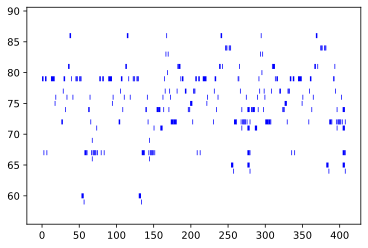

In [5]:
for nt in note_times: 
    plt.plot(list(nt[1]), [nt[0], nt[0]], lw=5, solid_capstyle='butt', color='blue')


plt.show()